In [1]:
from generate_test_beam_2 import generate_test_beam, generate_test_images

/global/common/software/m669/jpga/conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([-25.], device='cuda:0') tensor(nan, device='cuda:0', dtype=torch.float64)
tensor([-18.6842], device='cuda:0') tensor(nan, device='cuda:0', dtype=torch.float64)
tensor([-12.3684], device='cuda:0') tensor(nan, device='cuda:0', dtype=torch.float64)
tensor([-6.0526], device='cuda:0') tensor(nan, device='cuda:0', dtype=torch.float64)
tensor([0.2632], device='cuda:0') tensor(nan, device='cuda:0', dtype=torch.float64)
tensor([6.5789], device='cuda:0') tensor(nan, device='cuda:0', dtype=torch.float64)
tensor([12.8947], device='cuda:0') tensor(nan, device='cuda:0', dtype=torch.float64)


/global/common/software/m669/jpga/conda/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


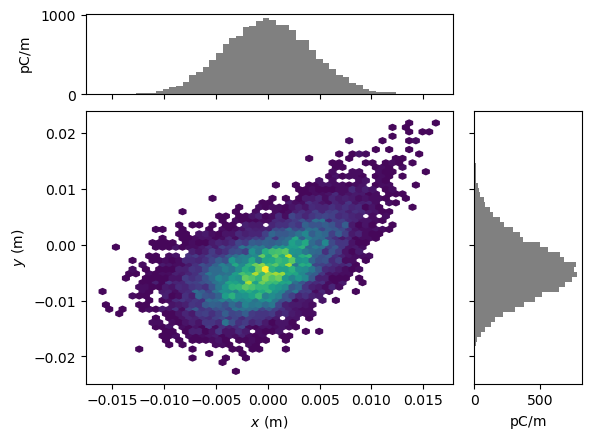

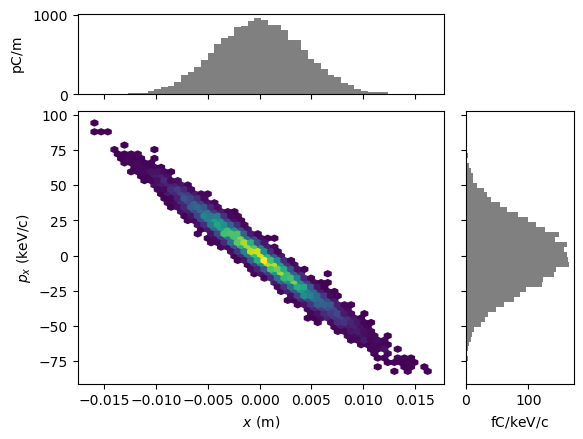

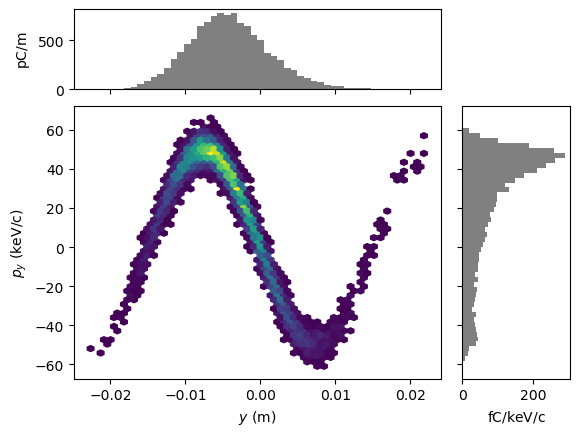

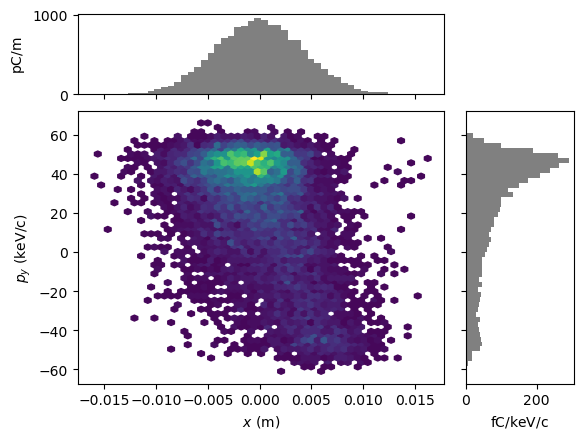

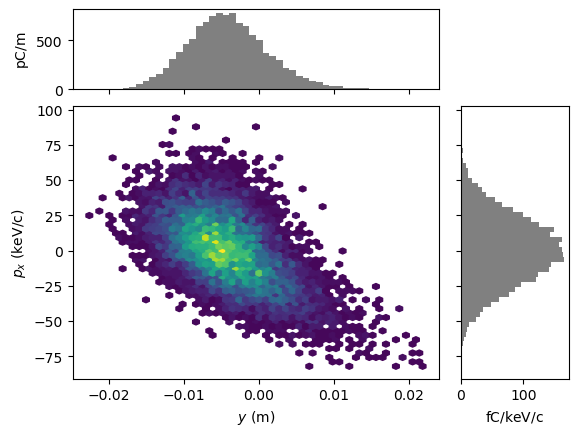

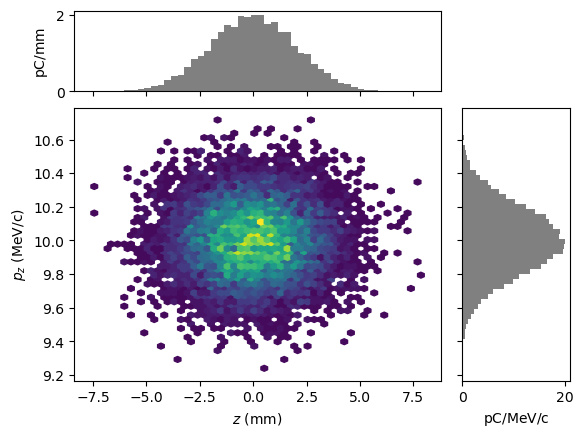

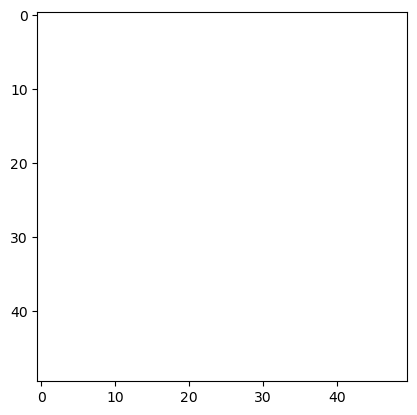

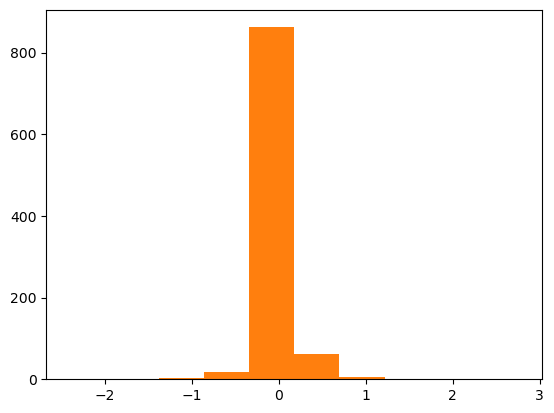

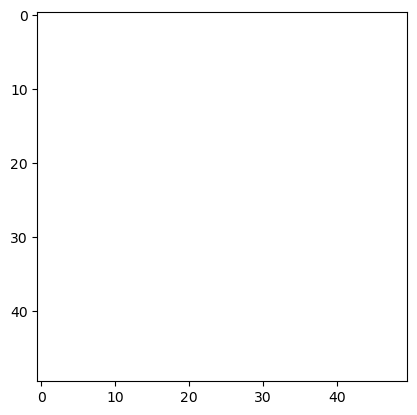

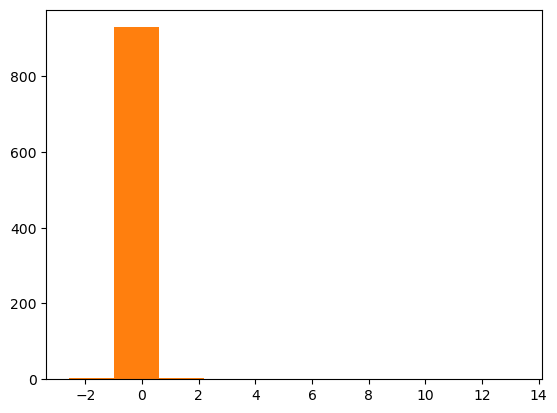

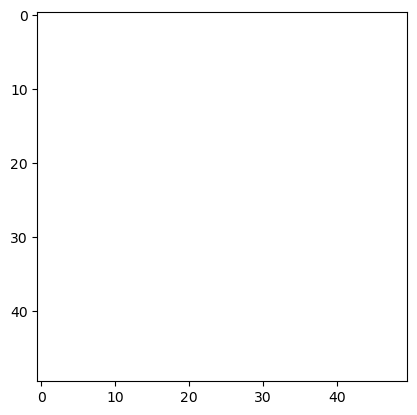

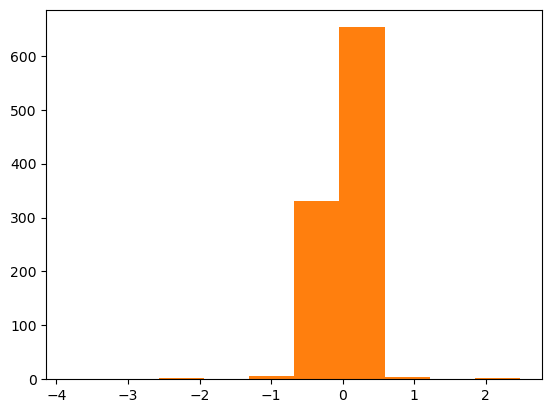

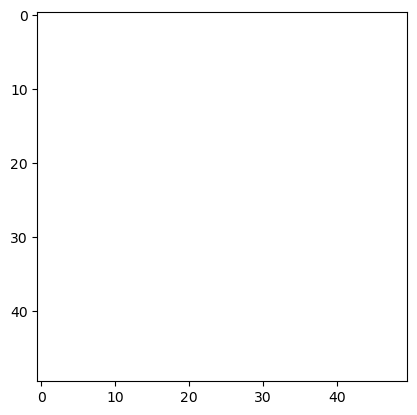

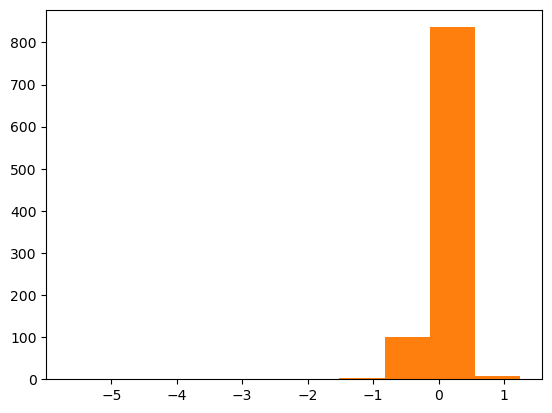

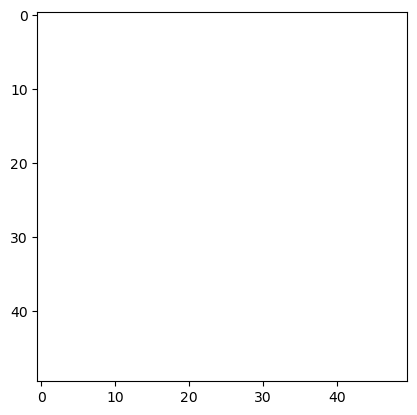

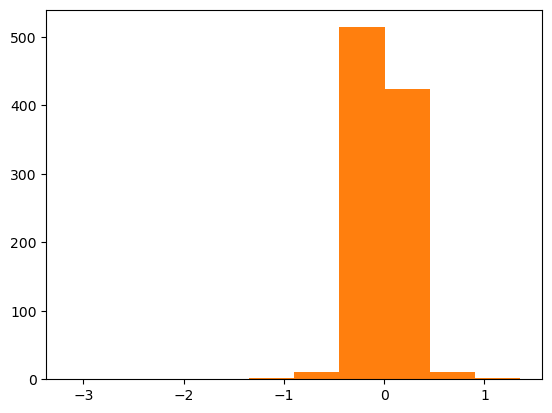

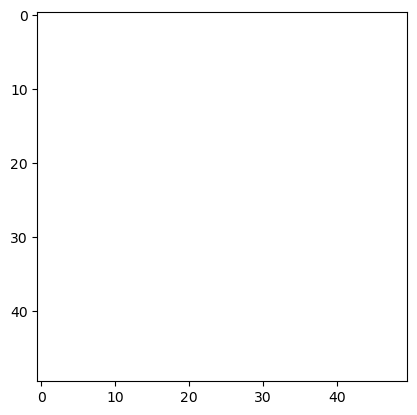

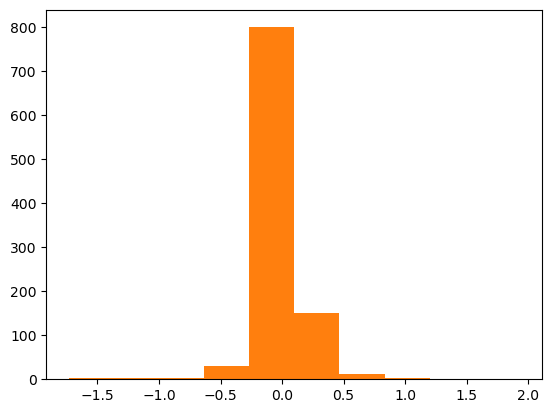

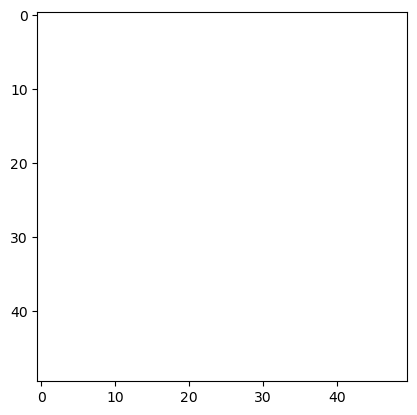

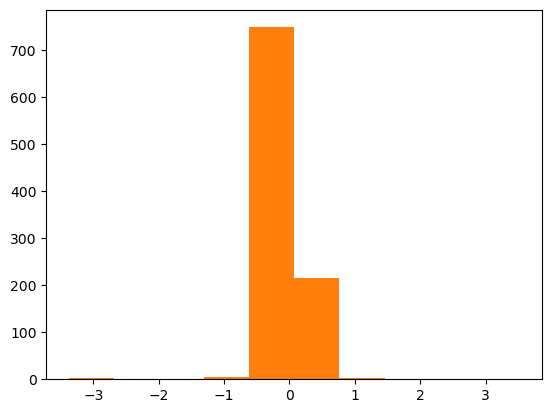

In [2]:
generate_test_images()

In [3]:
import torch
beam_coords = torch.load("ground_truth_dist.pt")
cov = torch.cov(beam_coords.T)

In [4]:
ycov = cov[2:4,2:4]
emit = torch.det(ycov).sqrt()
twiss = ycov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 1.1564314302006985e-05
beta 2.5884590589748964
alpha 0.9701904555127466
gamma 0.7499711124412487


In [5]:
xcov = cov[:2,:2]
emit = torch.det(xcov).sqrt()
twiss = xcov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 2.0075009255018616e-06
beta 8.967268682836442
alpha 4.982914302603411
gamma 2.880412738889799


In [6]:
beam_coords.shape

torch.Size([10000, 6])

In [7]:
bins = torch.load("bins.pt")

In [8]:
bins[1]-bins[0]

tensor(0.0012)

(array([  12.,   86.,  456., 1420., 2620., 2722., 1812.,  707.,  146.,
          19.]),
 array([-0.0760954 , -0.06132021, -0.04654502, -0.03176983, -0.01699464,
        -0.00221944,  0.01255575,  0.02733094,  0.04210613,  0.05688133,
         0.07165652]),
 <BarContainer object of 10 artists>)

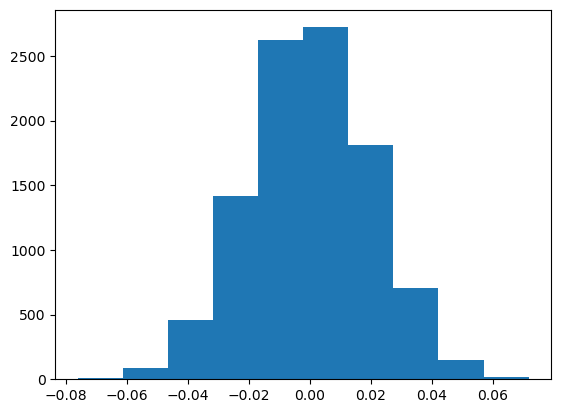

In [9]:
import matplotlib.pyplot as plt
plt.hist(beam_coords.T[-1].numpy())

In [10]:
from fitting import train_single_model

0 tensor(nan, device='cuda:0', grad_fn=<MulBackward0>)
100 tensor(nan, device='cuda:0', grad_fn=<MulBackward0>)
200 tensor(nan, device='cuda:0', grad_fn=<MulBackward0>)
300 tensor(nan, device='cuda:0', grad_fn=<MulBackward0>)
400 tensor(nan, device='cuda:0', grad_fn=<MulBackward0>)
500 tensor(nan, device='cuda:0', grad_fn=<MulBackward0>)
600 tensor(nan, device='cuda:0', grad_fn=<MulBackward0>)
700 tensor(nan, device='cuda:0', grad_fn=<MulBackward0>)
800 tensor(nan, device='cuda:0', grad_fn=<MulBackward0>)
900 tensor(nan, device='cuda:0', grad_fn=<MulBackward0>)


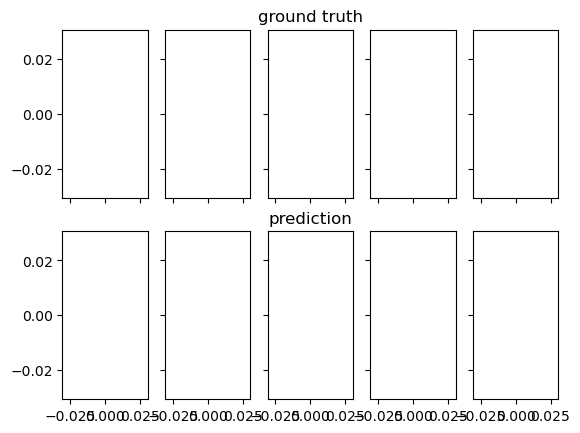

In [11]:
train_single_model()